# three body

### reference:
1. [matplot animation](https://towardsdatascience.com/animations-with-matplotlib-d96375c5442c)
2. [three body](https://towardsdatascience.com/modelling-the-three-body-problem-in-classical-mechanics-using-python-9dc270ad7767)

In [5]:
import numpy as np
import scipy as sci

#Import matplotlib and associated modules for 3D and animations
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation

In [2]:
#Define universal gravitation constant
G=6.67408e-11 #N-m2/kg2

#Reference quantities
m_nd=1.989e+30 #kg #mass of the sun
r_nd=5.326e+12 #m #distance between stars in Alpha Centauri
v_nd=30000 #m/s #relative velocity of earth around the sun
t_nd=79.91*365*24*3600*0.51 #s #orbital period of Alpha Centauri

#Net constants
K1=G*t_nd*m_nd/(r_nd**2*v_nd)
K2=v_nd*t_nd/r_nd

In [100]:
class metaverse():
    def __init__(self):
        #Define universal gravitation constant
        self.G=6.67408e-11 #N-m2/kg2

        #Reference quantities
        self.m_nd=1.989e+30 #kg #mass of the sun
        self.r_nd=5.326e+12 #m #distance between stars in Alpha Centauri
        self.v_nd=30000 #m/s #relative velocity of earth around the sun
        self.t_nd=79.91*365*24*3600*0.51 #s #orbital period of Alpha Centauri

        #Net constants
        self.K1=self.G*t_nd*self.m_nd/(self.r_nd**2*self.v_nd)
        self.K2=self.v_nd*self.t_nd/self.r_nd

In [101]:
universe = metaverse()

In [102]:
universe.G

6.67408e-11

In [109]:
#Define masses
m1=1.1 #Alpha Centauri A
m2=0.907 #Alpha Centauri B

#Define initial position vectors
r1=[-0.5,0,0] #m
r2=[0.5,0,0] #m

#Convert pos vectors to arrays
r1=np.array(r1,dtype="float64")
r2=np.array(r2,dtype="float64")

#Find Centre of Mass
r_com=(m1*r1+m2*r2)/(m1+m2)

#Define initial velocities
v1=[0.01,0.01,0] #m/s
v2=[-0.05,0,-0.1] #m/s

#Convert velocity vectors to arrays
v1=np.array(v1,dtype="float64")
v2=np.array(v2,dtype="float64")

#Find velocity of COM
v_com=(m1*v1+m2*v2)/(m1+m2)

In [105]:
class star():
    def __init__(self, m, r, v):
        #Define masses
        self.m=m
        
        #Define initial position vectors
        self.r=r #m
        #Convert pos vectors to arrays
        self.r=np.array(self.r,dtype="float64")

        #Define initial velocities
        self.v=v #m/s
        #Convert velocity vectors to arrays
        self.v=np.array(self.v,dtype="float64")

In [110]:
r_com

array([-0.04808171,  0.        ,  0.        ])

In [212]:
class com():
    """
    The centre of mass is a point where the the sum of the all 
    the mass moments of the system is zero — in simple terms, 
    you can imagine it as the point where the whole mass of the 
    system is balanced.
    """
    def __init__(self, m, r, v):
        self.m = np.array(m,dtype="float64")
        self.r = np.array(r,dtype="float64")
        self.v = np.array(v,dtype="float64")
        
        self.r_com = self.m.dot(self.r) / self.m.sum()
        self.v_com = self.m.dot(self.v) / self.m.sum()

In [215]:
c = com([1.1, 0.907], [[-0.5,0,0], [0.5,0,0]], [[0.01,0.01,0], [-0.05,0,-0.1]])

In [216]:
c.r_com

array([-0.04808171,  0.        ,  0.        ])

In [217]:
print(c.r_com)
print(c.v_com)

[-0.04808171  0.          0.        ]
[-0.0171151   0.00548082 -0.04519183]


In [10]:
#A function defining the equations of motion 
def TwoBodyEquations(w,t,G,m1,m2):
    r1=w[:3]
    r2=w[3:6]
    v1=w[6:9]
    v2=w[9:12]
    r=sci.linalg.norm(r2-r1) #Calculate magnitude or norm of vector
    dv1bydt=K1*m2*(r2-r1)/r**3
    dv2bydt=K1*m1*(r1-r2)/r**3
    dr1bydt=K2*v1
    dr2bydt=K2*v2
    r_derivs=np.concatenate((dr1bydt,dr2bydt))
    derivs=np.concatenate((r_derivs,dv1bydt,dv2bydt))
    return derivs

In [75]:
#Package initial parameters
init_params=np.array([r1,r2,v1,v2]) #create array of initial params
init_params=init_params.flatten() #flatten array to make it 1D

time_span=np.linspace(0,8,500) #8 orbital periods and 500 points

#Run the ODE solver
import scipy.integrate
two_body_sol=sci.integrate.odeint(TwoBodyEquations,init_params,time_span,args=(G,m1,m2))

In [76]:
r1_sol=two_body_sol[:,:3]
r2_sol=two_body_sol[:,3:6]

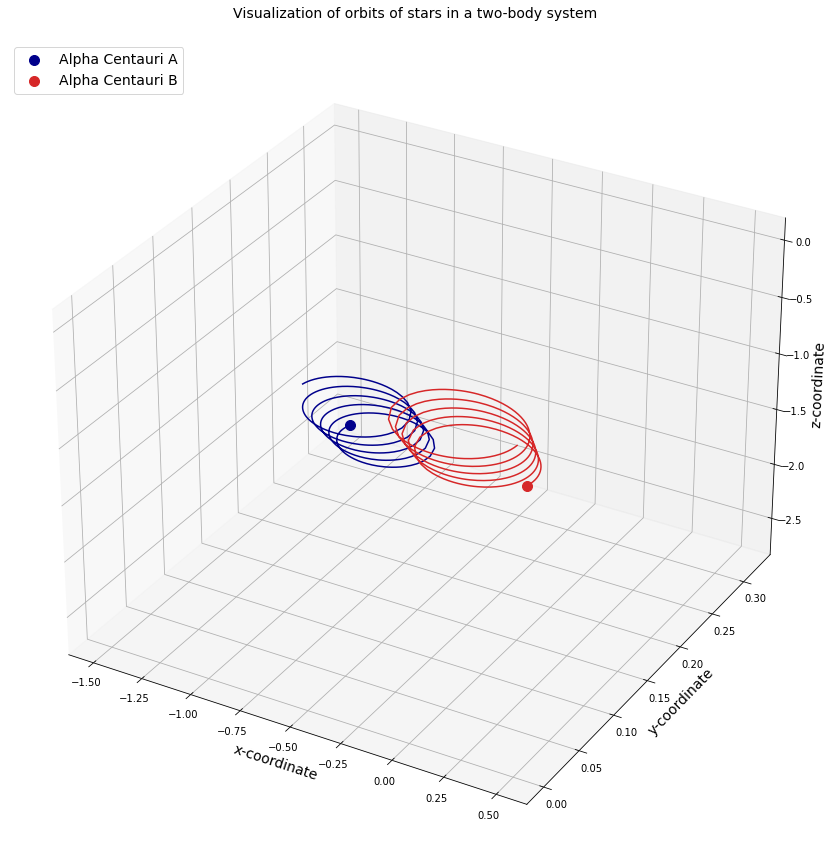

In [77]:
#Create figure
fig=plt.figure(figsize=(15,15))
#Create 3D axes
ax=fig.add_subplot(111,projection="3d")
#Plot the orbits
ax.plot(r1_sol[:,0],r1_sol[:,1],r1_sol[:,2],color="darkblue")
ax.plot(r2_sol[:,0],r2_sol[:,1],r2_sol[:,2],color="tab:red")
#Plot the final positions of the stars
ax.scatter(r1_sol[-1,0],r1_sol[-1,1],r1_sol[-1,2],color="darkblue",marker="o",s=100,label="Alpha Centauri A")
ax.scatter(r2_sol[-1,0],r2_sol[-1,1],r2_sol[-1,2],color="tab:red",marker="o",s=100,label="Alpha Centauri B")

#Add a few more bells and whistles
ax.set_xlabel("x-coordinate",fontsize=14)
ax.set_ylabel("y-coordinate",fontsize=14)
ax.set_zlabel("z-coordinate",fontsize=14)
ax.set_title("Visualization of orbits of stars in a two-body system\n",fontsize=14)
ax.legend(loc="upper left",fontsize=14)

## animation

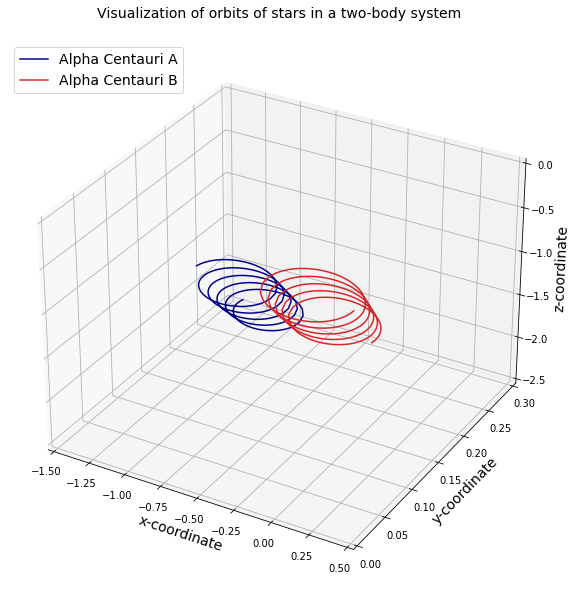

In [78]:
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111, projection="3d")

ax.set_xlim(-1.5, 0.5)
ax.set_ylim(0, 0.3)
ax.set_zlim(-2.5, 0)

sol = [r1_sol, r2_sol]
colors = ["darkblue", "tab:red"]
labels = ["Alpha Centauri A", "Alpha Centauri B"]

lines = []
for i in range(2):
    line, = ax.plot([], [], [], color=colors[i], label=labels[i])
    lines.append(line)

def init():
    for line in lines:
        line.set_data([], [])
        line.set_3d_properties([])
    return lines

def animate(i):
    for m, line in enumerate(lines):
        s = sol[m]
        x, y, z = s[:i ,0], s[:i, 1], s[:i, 2]

        line.set_data(x, y)
        line.set_3d_properties(z)
    return lines

anim = animation.FuncAnimation(fig, 
                                 animate, 
                                 init_func=init, 
                                 frames=500, 
                                 interval=10, 
                                 blit=True)

# ax.scatter(r1_sol[-1,0],r1_sol[-1,1],r1_sol[-1,2],color="darkblue",marker="o",s=100,label="Alpha Centauri A")
# ax.scatter(r2_sol[-1,0],r2_sol[-1,1],r2_sol[-1,2],color="tab:red",marker="o",s=100,label="Alpha Centauri B")

#Add a few more bells and whistles
ax.set_xlabel("x-coordinate", fontsize=14)
ax.set_ylabel("y-coordinate", fontsize=14)
ax.set_zlabel("z-coordinate", fontsize=14)
ax.set_title("Visualization of orbits of stars in a two-body system\n", fontsize=14)
ax.legend(loc="upper left", fontsize=14)

anim.save('treebody.gif', writer=animation.PillowWriter())

In [282]:
def plot(r1_sol, r2_sol, file_gif, title):
    sol = [r1_sol, r2_sol]
    
    # fig = plt.figure(figsize=(10,10))

    ax = fig.add_subplot(111, projection="3d")

    ax.set_xlim(-1.5, 0.5)
    ax.set_ylim(0, 0.3)
    ax.set_zlim(-2.5, 0)

    colors = ["darkblue", "tab:red"]
    labels = ["Alpha Centauri A", "Alpha Centauri B"]

    lines = []
    for i in range(2):
        line, = ax.plot([], [], [], color=colors[i], label=labels[i])
        lines.append(line)

    def init():
        for line in lines:
            line.set_data([], [])
            line.set_3d_properties([])
        return lines

    def animate(i):
        for m, line in enumerate(lines):
            s = sol[m]
            x, y, z = s[:i ,0], s[:i, 1], s[:i, 2]

            line.set_data(x, y)
            line.set_3d_properties(z)
        return lines

    anim = animation.FuncAnimation(fig, 
                                     animate, 
                                     init_func=init, 
                                     frames=500, 
                                     interval=10, 
                                     blit=True)

    #Add a few more bells and whistles
    ax.set_xlabel("x-coordinate", fontsize=14)
    ax.set_ylabel("y-coordinate", fontsize=14)
    ax.set_zlabel("z-coordinate", fontsize=14)
    ax.set_title(title, fontsize=14)
    ax.legend(loc="upper left", fontsize=14)

    anim.save(file_gif, writer=animation.PillowWriter())
    return None

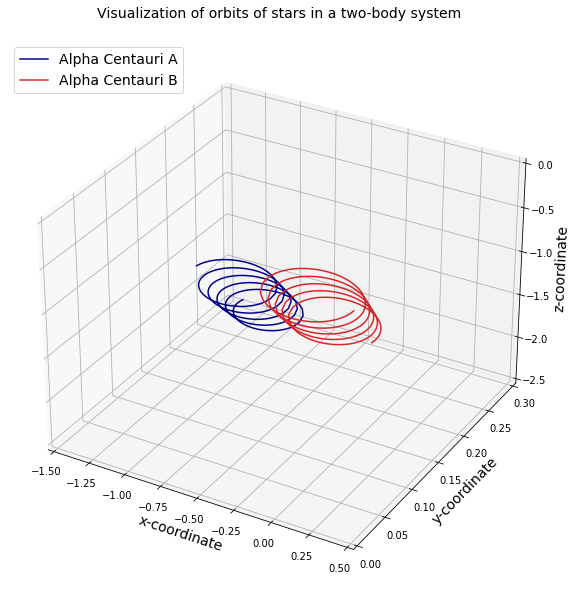

In [85]:
plot(r1_sol, r2_sol, file_gif='two_body_model.gif')

In [79]:
#Find location of COM
rcom_sol=(m1*r1_sol+m2*r2_sol)/(m1+m2)
#Find location of Alpha Centauri A w.r.t COM
r1com_sol=r1_sol-rcom_sol
#Find location of Alpha Centauri B w.r.t COM
r2com_sol=r2_sol-rcom_sol

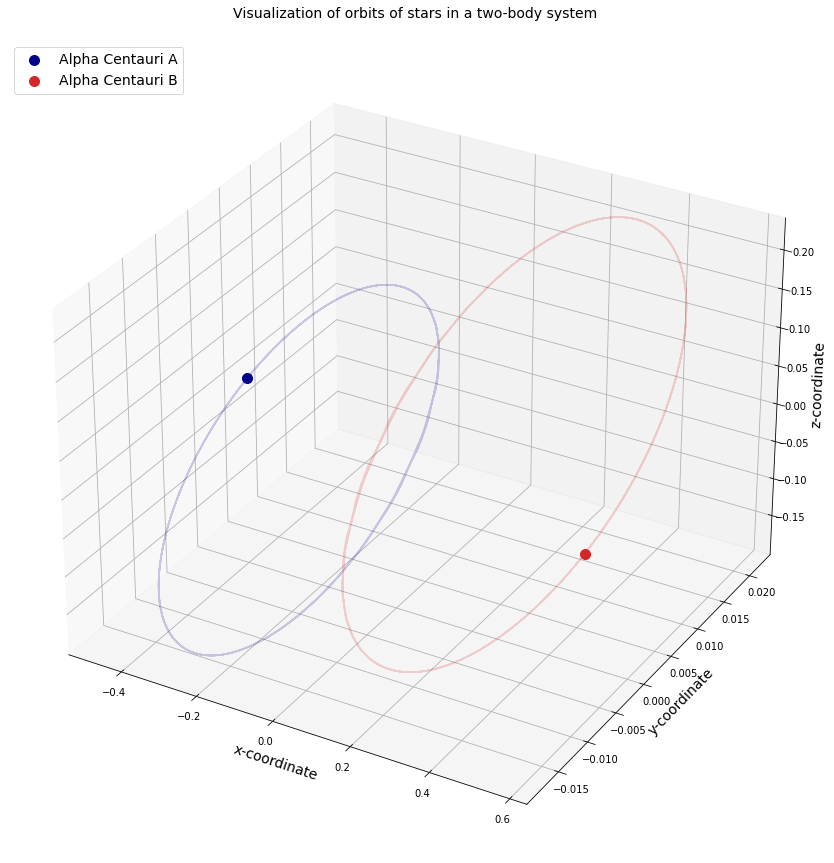

In [243]:
#Create figure
fig=plt.figure(figsize=(15,15))
#Create 3D axes
ax=fig.add_subplot(111,projection="3d")
#Plot the orbits
ax.plot(r1com_sol[:,0],r1com_sol[:,1],r1com_sol[:,2],color="darkblue", alpha=0.2)
ax.plot(r2com_sol[:,0],r2com_sol[:,1],r2com_sol[:,2],color="tab:red", alpha=0.2)
#Plot the final positions of the stars
ax.scatter(r1com_sol[-1,0],r1com_sol[-1,1],r1com_sol[-1,2],color="darkblue",marker="o",s=100,label="Alpha Centauri A")
ax.scatter(r2com_sol[-1,0],r2com_sol[-1,1],r2com_sol[-1,2],color="tab:red",marker="o",s=100,label="Alpha Centauri B")
#Add a few more bells and whistles
ax.set_xlabel("x-coordinate",fontsize=14)
ax.set_ylabel("y-coordinate",fontsize=14)
ax.set_zlabel("z-coordinate",fontsize=14)
ax.set_title("Visualization of orbits of stars in a two-body system\n",fontsize=14)
ax.legend(loc="upper left",fontsize=14)

In [96]:
plot(r1com_sol, r2com_sol, 
     file_gif='two_body_COM.gif', 
     title='Visualization of orbits of stars in a two-body system from COM\n')

## three body

In [97]:
#Find location of COM
rcom_sol=(m1*r1_sol+m2*r2_sol)/(m1+m2)
#Find location of Alpha Centauri A w.r.t COM
r1com_sol=r1_sol-rcom_sol
#Find location of Alpha Centauri B w.r.t COM
r2com_sol=r2_sol-rcom_sol

In [ ]:
#Mass of the Third Star
m3=1.0 #Third Star
#Position of the Third Star
r3=[0,1,0] #m
r3=sci.array(r3,dtype="float64")
#Velocity of the Third Star
v3=[0,-0.01,0]
v3=sci.array(v3,dtype="float64")

In [106]:
s3 = star(m=1, r=[0,1,0], v=[0,-0.01,0])

In [ ]:
#Update COM formula
r_com=(m1*r1+m2*r2+m3*r3)/(m1+m2+m3)
#Update velocity of COM formula
v_com=(m1*v1+m2*v2+m3*v3)/(m1+m2+m3)

In [220]:
m = [1.1, 0.907, 1]
r = [[-0.5,0,0], [0.5,0,0], [0,1,0]]
v = [[0.01,0.01,0], [-0.05,0,-0.1], [0,-0.01,0]]

c = com(m=m, 
        r=r, 
        v=v)

In [274]:
def ThreeBodyEquations(w,t,K1,K2,m1,m2,m3):
    r1=w[:3]
    r2=w[3:6]
    r3=w[6:9]
    v1=w[9:12]
    v2=w[12:15]
    v3=w[15:18]
    r12=sci.linalg.norm(r2-r1)
    r13=sci.linalg.norm(r3-r1)
    r23=sci.linalg.norm(r3-r2)
    
    dv1bydt=K1*m2*(r2-r1)/r12**3+K1*m3*(r3-r1)/r13**3
    dv2bydt=K1*m1*(r1-r2)/r12**3+K1*m3*(r3-r2)/r23**3
    dv3bydt=K1*m1*(r1-r3)/r13**3+K1*m2*(r2-r3)/r23**3
    dr1bydt=K2*v1
    dr2bydt=K2*v2
    dr3bydt=K2*v3
    r12_derivs=np.concatenate((dr1bydt,dr2bydt))
    r_derivs=np.concatenate((r12_derivs,dr3bydt))
    v12_derivs=np.concatenate((dv1bydt,dv2bydt))
    v_derivs=np.concatenate((v12_derivs,dv3bydt))
    derivs=np.concatenate((r_derivs,v_derivs))
    return derivs

In [275]:
#Package initial parameters
init_params=np.array([r, v]) #Initial parameters
init_params=init_params.flatten() #Flatten to make 1D array
time_span=np.linspace(0,20,500) #20 orbital periods and 500 points

#Run the ODE solver
three_body_sol=sci.integrate.odeint(ThreeBodyEquations,init_params,time_span,args=(K1, K2,m[0], m[1], m[2]))

In [276]:
r1_sol=three_body_sol[:,:3]
r2_sol=three_body_sol[:,3:6]
r3_sol=three_body_sol[:,6:9]

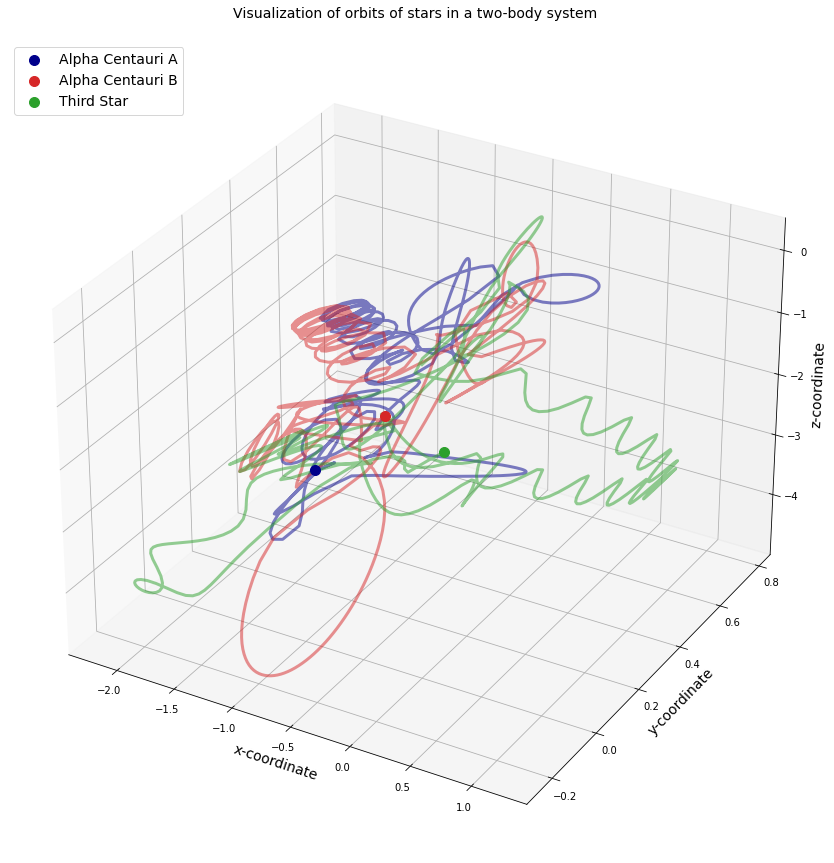

In [277]:
#Create figure
fig=plt.figure(figsize=(15,15))
#Create 3D axes
ax=fig.add_subplot(111,projection="3d")
#Plot the orbits
ax.plot(r1_sol[:,0],r1_sol[:,1],r1_sol[:,2],color="darkblue", alpha=0.5, linewidth=3)
ax.plot(r2_sol[:,0],r2_sol[:,1],r2_sol[:,2],color="tab:red", alpha=0.5, linewidth=3)
ax.plot(r3_sol[:,0],r2_sol[:,1],r3_sol[:,2],color="tab:green", alpha=0.5, linewidth=3)

#Plot the final positions of the stars
ax.scatter(r1_sol[-1,0],r1_sol[-1,1],r1_sol[-1,2],color="darkblue",marker="o",s=100,label="Alpha Centauri A")
ax.scatter(r2_sol[-1,0],r2_sol[-1,1],r2_sol[-1,2],color="tab:red",marker="o",s=100,label="Alpha Centauri B")
ax.scatter(r3_sol[-1,0],r2_sol[-1,1],r3_sol[-1,2],color="tab:green",marker="o",s=100,label="Third Star")

#Add a few more bells and whistles
ax.set_xlabel("x-coordinate",fontsize=14)
ax.set_ylabel("y-coordinate",fontsize=14)
ax.set_zlabel("z-coordinate",fontsize=14)
ax.set_title("Visualization of orbits of stars in a two-body system\n",fontsize=14)
ax.legend(loc="upper left",fontsize=14)

In [250]:
def plot(r_sol, file_gif, title, colors, labels,
         xlim=(-2, 2), ylim=(-0.2, 0.8), zlim=(-4, 0)):
    
    n = len(r_sol)
    
    fig=plt.figure(figsize=(15,15))
    ax = fig.add_subplot(111, projection="3d")

    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.set_zlim(zlim)

    lines = []
    for i in range(n):
        line, = ax.plot([], [], [], color=colors[i], label=labels[i], alpha=0.5, linewidth=3)
        lines.append(line)

    def init():
        for line in lines:
            line.set_data([], [])
            line.set_3d_properties([])
        return lines

    def animate(i):
        for m, line in enumerate(lines):
            r = r_sol[m]
            x, y, z = r[:i ,0], r[:i, 1], r[:i, 2]

            line.set_data(x, y)
            line.set_3d_properties(z)
        return lines

    anim = animation.FuncAnimation(fig, 
                                     animate, 
                                     init_func=init, 
                                     frames=500, 
                                     interval=10, 
                                     blit=True)

    #Add a few more bells and whistles
    ax.set_xlabel("x-coordinate", fontsize=14)
    ax.set_ylabel("y-coordinate", fontsize=14)
    ax.set_zlabel("z-coordinate", fontsize=14)
    ax.set_title(title, fontsize=14)
    ax.legend(loc="upper left", fontsize=14)

    anim.save(file_gif, writer=animation.PillowWriter())
    plt.show()
    return None

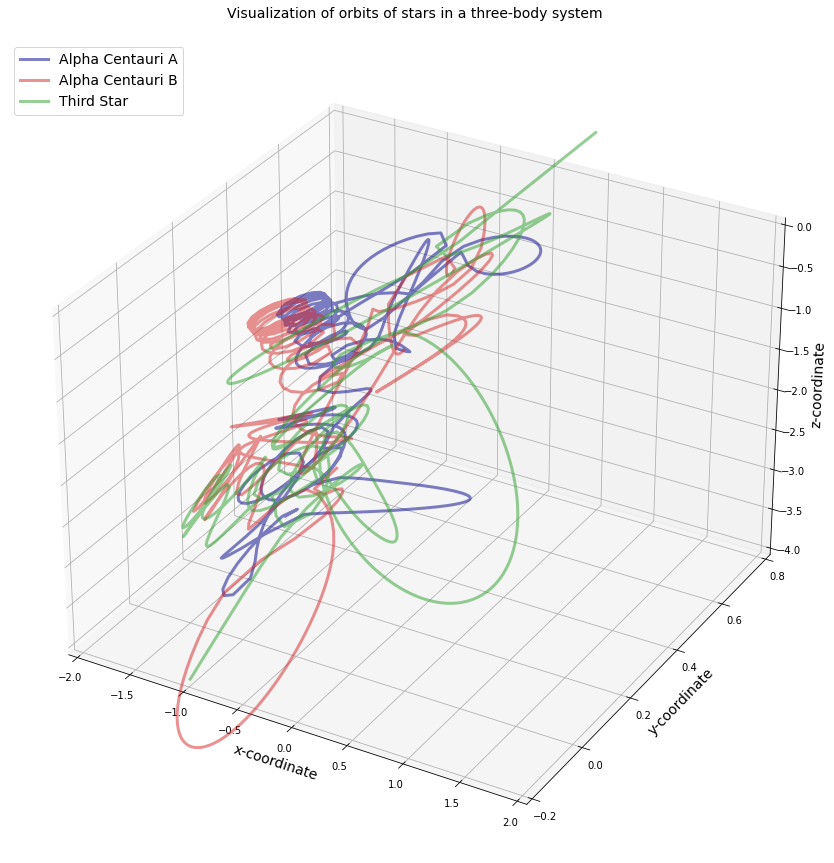

In [251]:
r1_sol=three_body_sol[:,:3]
r2_sol=three_body_sol[:,3:6]
r3_sol=three_body_sol[:,6:9]

r_sol = [r1_sol, r2_sol, r3_sol]
colors = ["darkblue", "tab:red", "tab:green"]
labels = ["Alpha Centauri A", "Alpha Centauri B", "Third Star"]

plot(r_sol=r_sol, 
     file_gif="three_body_model.gif", 
     title="Visualization of orbits of stars in a three-body system\n",
     colors=colors,
     labels=labels)

In [ ]:
#Package initial parameters
init_params=np.array([r, v]) #Initial parameters
init_params=init_params.flatten() #Flatten to make 1D array
time_span=np.linspace(0,20,500) #20 orbital periods and 500 points

#Run the ODE solver
three_body_sol=sci.integrate.odeint(ThreeBodyEquations,init_params,time_span,args=(G,m[0], m[1], m[2]))

In [266]:
class simulation:
    def __init__(self, universe, m, r, v, orbital_periods, points):
        self.universe = universe
        self.G = self.universe.G
        self.K1 = self.universe.K1
        self.K2 = self.universe.K2
        self.m = m
        self.r = r 
        self.v = v
        self.orbital_periods = orbital_periods
        self.points = points
        
        #Package initial parameters
        self.init_params=np.array([self.r, self.v]) #Initial parameters
        self.init_params=self.init_params.flatten() #Flatten to make 1D array
        self.time_span=np.linspace(0, self.orbital_periods, self.points) 

    def TwoBodyEquations(w,t,K1,K2,m1,m2):
        r1=w[:3]
        r2=w[3:6]
        v1=w[6:9]
        v2=w[9:12]
        r=sci.linalg.norm(r2-r1) #Calculate magnitude or norm of vector
        dv1bydt=K1*m2*(r2-r1)/r**3
        dv2bydt=K1*m1*(r1-r2)/r**3
        dr1bydt=K2*v1
        dr2bydt=K2*v2
        r_derivs=np.concatenate((dr1bydt,dr2bydt))
        derivs=np.concatenate((r_derivs,dv1bydt,dv2bydt))
        return derivs

    def ThreeBodyEquations(w,t,K1,K2,m1,m2,m3):
        r1=w[:3]
        r2=w[3:6]
        r3=w[6:9]
        v1=w[9:12]
        v2=w[12:15]
        v3=w[15:18]
        r12=sci.linalg.norm(r2-r1)
        r13=sci.linalg.norm(r3-r1)
        r23=sci.linalg.norm(r3-r2)

        dv1bydt=K1*m2*(r2-r1)/r12**3+K1*m3*(r3-r1)/r13**3
        dv2bydt=K1*m1*(r1-r2)/r12**3+K1*m3*(r3-r2)/r23**3
        dv3bydt=K1*m1*(r1-r3)/r13**3+K1*m2*(r2-r3)/r23**3
        dr1bydt=K2*v1
        dr2bydt=K2*v2
        dr3bydt=K2*v3
        r12_derivs=np.concatenate((dr1bydt,dr2bydt))
        r_derivs=np.concatenate((r12_derivs,dr3bydt))
        v12_derivs=np.concatenate((dv1bydt,dv2bydt))
        v_derivs=np.concatenate((v12_derivs,dv3bydt))
        derivs=np.concatenate((r_derivs,v_derivs))
        return derivs

    def two_body_solver(self):
        return sci.integrate.odeint(func=self.TwoBodyEquations,
                                    y0=self.init_params,
                                    t=self.time_span,
                                    args=(self.K1, self.K2, self.m[0], self.m[1]))
    
    def tree_body_solver(self):
        return sci.integrate.odeint(self.ThreeBodyEquations,
                                    self.init_params,
                                    self.time_span,
                                    args=(self.K1,self.K2,self.m[0],self.m[1],self.m[2]))
    
    

In [271]:
def ode(m, r, v, orbital_periods=20, points=500):
    #Package initial parameters
    init_params=np.array([r, v]) #Initial parameters
    init_params=init_params.flatten() #Flatten to make 1D array
    time_span=np.linspace(0,orbital_periods,points) #20 orbital periods and 500 points

    #Run the ODE solver
    three_body_sol=sci.integrate.odeint(ThreeBodyEquations,init_params,time_span,args=(G,m[0], m[1], m[2]))
    
    r1_sol=three_body_sol[:,:3]
    r2_sol=three_body_sol[:,3:6]
    r3_sol=three_body_sol[:,6:9]

    r_sol = [r1_sol, r2_sol, r3_sol]
    return r_sol

In [272]:
r_sol = ode(m, r, v)

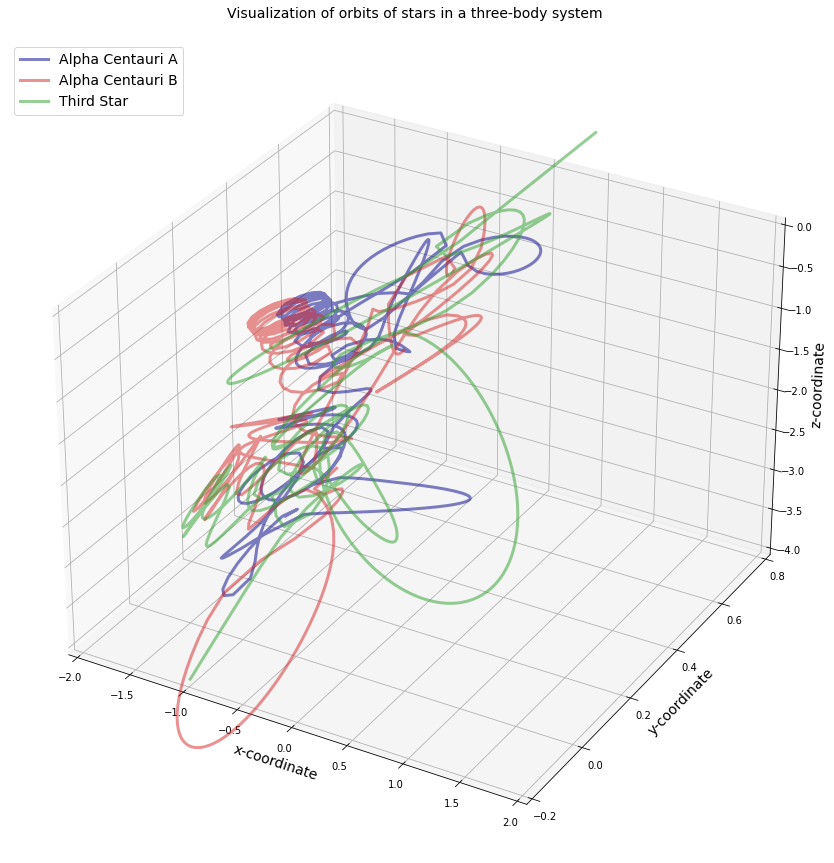

In [273]:
colors = ["darkblue", "tab:red", "tab:green"]
labels = ["Alpha Centauri A", "Alpha Centauri B", "Third Star"]

plot(r_sol=r_sol, 
     file_gif="three_body_model.gif", 
     title="Visualization of orbits of stars in a three-body system\n",
     colors=colors,
     labels=labels)

In [278]:
def ThreeBodyEquations(w,t,K,m):
    K1=K[0]
    K2=K[1]
    m1=m[0]
    m2=m[1]
    m3=m[2]
    r1=w[:3]
    r2=w[3:6]
    r3=w[6:9]
    v1=w[9:12]
    v2=w[12:15]
    v3=w[15:18]
    r12=sci.linalg.norm(r2-r1)
    r13=sci.linalg.norm(r3-r1)
    r23=sci.linalg.norm(r3-r2)
    
    dv1bydt=K1*m2*(r2-r1)/r12**3+K1*m3*(r3-r1)/r13**3
    dv2bydt=K1*m1*(r1-r2)/r12**3+K1*m3*(r3-r2)/r23**3
    dv3bydt=K1*m1*(r1-r3)/r13**3+K1*m2*(r2-r3)/r23**3
    dr1bydt=K2*v1
    dr2bydt=K2*v2
    dr3bydt=K2*v3
    r12_derivs=np.concatenate((dr1bydt,dr2bydt))
    r_derivs=np.concatenate((r12_derivs,dr3bydt))
    v12_derivs=np.concatenate((dv1bydt,dv2bydt))
    v_derivs=np.concatenate((v12_derivs,dv3bydt))
    derivs=np.concatenate((r_derivs,v_derivs))
    return derivs


In [279]:
def ode_3body(m, r, v, K, orbital_periods=20, points=500):
    #Package initial parameters
    init_params=np.array([r, v]) #Initial parameters
    init_params=init_params.flatten() #Flatten to make 1D array
    time_span=np.linspace(0,orbital_periods,points) #20 orbital periods and 500 points

    #Run the ODE solver
    three_body_sol=sci.integrate.odeint(ThreeBodyEquations,init_params,time_span,args=(K,m))
    
    r1_sol=three_body_sol[:,:3]
    r2_sol=three_body_sol[:,3:6]
    r3_sol=three_body_sol[:,6:9]

    r_sol = [r1_sol, r2_sol, r3_sol]
    return r_sol

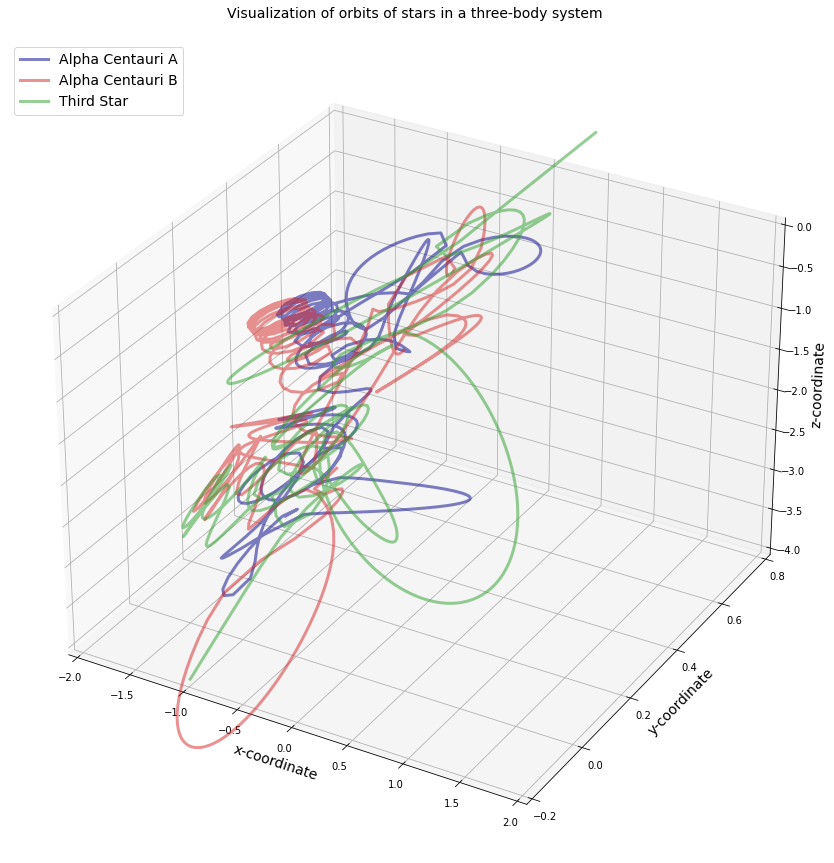

In [280]:
meta = metaverse()
K = [meta.K1, meta.K2]

m = [1.1, 0.907, 1]
r = [[-0.5,0,0], [0.5,0,0], [0,1,0]]
v = [[0.01,0.01,0], [-0.05,0,-0.1], [0,-0.01,0]]

colors = ["darkblue", "tab:red", "tab:green"]
labels = ["Alpha Centauri A", "Alpha Centauri B", "Third Star"]

r_sol = ode_3body(m, r, v, K)

plot(r_sol=r_sol, 
     file_gif="three_body_model.gif", 
     title="Visualization of orbits of stars in a three-body system\n",
     colors=colors,
     labels=labels)

In [281]:
pip show scipy

Name: scipy
Version: 1.7.3
Summary: SciPy: Scientific Library for Python
Home-page: https://www.scipy.org
Author: 
Author-email: 
License: BSD
Location: /Users/ewang1/Library/Python/3.8/lib/python/site-packages
Requires: numpy
Required-by: 
Note: you may need to restart the kernel to use updated packages.
